In [32]:
import csv
from copy import copy
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from PIL import Image
import requests
import numpy as np
from math import pi

class track:
    def __init__(self, name, album, artist, duration_ms = 0, explicit = False, 
                 popularity = 0, release = '', image_url = '', danceability = 0.0, 
                 energy = 0.0, key = 0, loudness = 0.0, mode = 0, speechiness = 0.0, 
                 acousticness = 0.0, instrumentalness = 0.0, liveness = 0.0, 
                 valence = 0.0, tempo = 0.0, label = '', country = '', genres = '', 
                 styles = ''):
        
        self.name = str(name)
        self.album = str(album)
        self.artist = str(artist)
        try:
            self.duration_ms = int(duration_ms)
        except:
            self.duration_ms = 0
        self.explicit = bool(explicit)
        try:
            self.popularity = int(popularity)
        except:
            self.popularity = 0
        self.release = str(release)
        self.image_url = str(image_url)
        try:
            self.danceability = float(danceability)
        except:
            self.danceability = 0.0
        try:
            self.energy = float(energy)
        except:
            self.energy = 0.0
        try:
            self.key = int(key)
        except:
            self.key = 0
        try:
            self.loudness = float(loudness)
        except:
            self.loudness = 0.0
        try:
            self.mode = int(mode)
        except:
            self.mode = 0
        try:
            self.speechiness = float(speechiness)
        except:
            self.speechiness = 0.0
        try:
            self.acousticness = float(acousticness)
        except:
            self.acousticness = 0.0
        try:
            self.instrumentalness = float(instrumentalness)
        except:
            self.instrumentalness = 0.0
        try:
            self.liveness = float(liveness)
        except:
            self.liveness = 0.0
        try:
            self.valence = float(valence)
        except:
            self.valence = 0.0
        try:
            self.tempo = float(tempo)
        except:
            self.tempo = 0.0
        self.label = str(label)
        self.country = str(country)
        self.genres = str(genres)
        self.styles = str(styles)
        
    
    def __repr__(self):
        return self.name
    
    def __str__(self):
        return self.name
    
    def __len__(self):
        return self.duration_ms
    
    def __copy__(self):
        return type(self)(self.name, self.album, self.artist, self.duration_ms, 
                          self.explicit, self.popularity, self.release, self.image_url, 
                          self.danceability, self.energy, self.key, self.loudness, self.mode, 
                          self.speechiness, self.acousticness, self.instrumentalness, 
                          self.liveness, self.valence, self.tempo, self.label, self.country, 
                          self.genres, self.styles)
    def image(self):
        try:
            ax = plt.axes([0,0,1,1])
            plt.axis("off")
            im = Image.open(requests.get(self.image_url, stream=True).raw)
            display=imshow(im)
        except:
            if self.image_url == '':
                print(self.name,'has no image url')
            else:
                print('Invalid image url:', self.image_url)
            
    def plot(self):
        # creating list of catagories
        categories = ['popularity', 'danceability', 'energy', 'speechiness', 'acousticness', 
                      'instrumentalness', 'liveness', 'valence']
        space = ' '*20
        categories = [space + i for i in categories[:2]] + categories[2:3] + \
                        [i + space for i in categories[3:6]] + categories[6:7] + \
                            [space+i for i in categories[7:8]]
        
        values = [self.popularity/100, self.danceability, self.energy, self.speechiness, 
                  self.acousticness, self.instrumentalness, self.liveness, self.valence]
        
        N = len(categories)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        
        # creating polar plot
        plt.figure(figsize=(6, 6))
        ax = plt.subplot(111, polar=True)
        plt.xticks(angles, categories, color='gray', size=10)
        plt.yticks([], [], color="gray", size=10)
        plt.ylim(0,1)
        ax.plot(angles + angles[:1], values + values[:1], color='b', linewidth=1, linestyle='solid')
        ax.fill(angles + angles[:1], values + values[:1], 'b', alpha=0.2)
        plt.title(self.name + ' audio features')
        plt.show()
        
    def info(self):
        print('name:', self.name)
        print('album:', self.album)
        print('artist:', self.artist)
        print('duration_ms:', self.duration_ms)
        print('explicit:', self.explicit)
        print('popularity:', self.popularity)
        print('release:', self.release)
        print('image_url:', self.image_url)
        print('danceability:',self.danceability)
        print('energy:', self.energy)
        print('key:', self.key)
        print('loudness:', self.loudness)
        print('mode:', self.mode)
        print('speechiness:', self.speechiness)
        print('acousticness:', self.acousticness)
        print('instrumentalness:', self.instrumentalness)
        print('liveness:', self.liveness)
        print('valence:', self.valence)
        print('tempo:', self.tempo)
        print('label:', self.label)
        print('country:', self.country)
        print('genres:', self.genres)
        print('styles:', self.styles)

class playlist:
    def __init__(self, name = 'New Playlist', description = '', tracks = None, image_url=''):
        # mutable lists ruin everything, have to add this conditional so empty 
        # list is created on init not on function declaration
        if tracks == None:
            tracks = []
        self.name = name
        self.description = description
        self.tracks = tracks
        self.image_url = image_url
    
    def __len__(self):
        return len(self.tracks)
    
    def __repr__(self):
        return self.name
    
    def __str__(self):
        return self.name
        
    def __copy__(self):
        track_copies = [copy(track) for track in self.tracks]
        return type(self)(self.name, self.description, track_copies)
    
    def add(self, track):
        self.tracks.append(track)
    
    def delete(self, track):
        del self.tracks[self.tracks.index(track)]
        
    def artists(self):
        return [track.artist for track in self.tracks]
    
    def albums(self):
        return [track.album for track in self.tracks]
    
    def image(self):
        try:
            ax = plt.axes([0,0,1,1])
            plt.axis("off")
            im = Image.open(requests.get(self.image_url, stream=True).raw)
            display=imshow(im)
        except:
            if self.image_url == '':
                print(self.name,'has no image url')
            else:
                print('Invalid image url:', self.image_url)
            
    def duration_ms(self):
        return sum([track.duration_ms for track in self.tracks])
    
    def popularity(self):
        return np.mean([track.popularity for track in self.tracks])

    def danceability(self):
        return np.mean([track.danceability for track in self.tracks])
    
    def energy(self):
        return np.mean([track.energy for track in self.tracks])
    
    def key(self):
        return np.mean([track.key for track in self.tracks])
    
    def loudness(self):
        return np.mean([track.loudness for track in self.tracks])
    
    def mode(self):
        return np.mean([track.mode for track in self.tracks])
    
    def speechiness(self):
        return np.mean([track.speechiness for track in self.tracks])
    
    def acousticness(self):
        return np.mean([track.acousticness for track in self.tracks])
    
    def instrumentalness(self):
        return np.mean([track.instrumentalness for track in self.tracks])
    
    def liveness(self):
        return np.mean([track.liveness for track in self.tracks])
    
    def valence(self):
        return np.mean([track.valence for track in self.tracks])
    
    def tempo(self):
        return np.mean([track.tempo for track in self.tracks])
    
    def plot(self):
        # creating list of catagories
        categories = ['popularity', 'danceability', 'energy', 'speechiness', 'acousticness', 
                      'instrumentalness', 'liveness', 'valence']
        space = ' ' * 20
        categories = [space + i for i in categories[:2]] + categories[2:3] + \
                        [i + space for i in categories[3:6]] + categories[6:7] + \
                            [space+i for i in categories[7:8]]
        
        values = [self.popularity()/100, self.danceability(), self.energy(), self.speechiness(), 
                  self.acousticness(), self.instrumentalness(), self.liveness(), self.valence()]
        
        N = len(categories)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        
        # creating polar plot
        plt.figure(figsize=(6, 6))
        ax = plt.subplot(111, polar=True)
        plt.xticks(angles, categories, color='gray', size=10)
        plt.yticks([], [], color="gray", size=10)
        plt.ylim(0,1)
        ax.plot(angles + angles[:1], values + values[:1], color='g', linewidth=1, linestyle='solid')
        ax.fill(angles + angles[:1], values + values[:1], 'g', alpha=0.2)
        plt.title(p.name + ' audio features')
        plt.show()
        
    def info(self):
        print('name:', self.name)
        print('description:', self.description)
        print('duration_ms:', self.duration_ms())
        print('tracks:')
        for i in self.tracks:
            print(' ',i)
        print('image_url:', self.image_url)
        print('danceability:',self.danceability())
        print('energy:', self.energy())
        print('key:', self.key())
        print('loudness:', self.loudness())
        print('mode:', self.mode())
        print('speechiness:', self.speechiness())
        print('acousticness:', self.acousticness())
        print('instrumentalness:', self.instrumentalness())
        print('liveness:', self.liveness())
        print('valence:', self.valence())
        print('tempo:', self.tempo())
    
class combiner:
    def __init__(self, playlist_a, playlist_b):
        self.a = playlist_a
        self.b = playlist_b
    def combined(self):
        return playlist(tracks = self.a.tracks + self.b.tracks)

class merger:
    def __init__(self, playlist):
        self.playlist = playlist
    
    # merging data in discogs csv with corresponding data in our playlist
    def add_discogs(self,filename):
        with open(filename, newline='') as csvfile:
            dsreader = list(csv.reader(csvfile))
            for track in self.playlist.tracks:
                for row in dsreader[1:]:
                    if track.name == row[0]:
                        track.label = row[3]
                        track.country = row[4]
                        track.genres = row[5]
                        track.styles = row[6]
    
    # merging data in spotify csv with corresponding data in our playlist
    def add_spotify(self,filename):
        with open(filename, newline='') as csvfile:
            spreader = list(csv.reader(csvfile))
            for track in self.playlist.tracks:
                for row in spreader[1:]:
                    if track.name == row[0]:
                        track.duration_ms = row[3]
                        track.explicit = row[4]
                        track.popularity = row[5]
                        track.release = row[6]
                        track.image_url = row[7]
                        track.danceability = row[8]
                        track.energy = row[9]
                        track.key = row[10]
                        track.loudness = row[11]
                        track.mode = row[12]
                        track.speechiness = row[13]
                        track.acousticness = row[14]
                        track.instrumentalness = row[15]
                        track.liveness = row[16]
                        track.valence = row[17]
                        track.tempo = row[18]
    
class porter:
    def __init__(self, playlist, track = track):
        self.playlist = playlist
        
    def port(self, filename, spinitron=False, track = track):
        if spinitron:
            if len(self.playlist.tracks) == 0:
                print(filename, '>>>', self.playlist)
                with open(filename, newline='') as csvfile:
                    spreader = list(csv.reader(csvfile))
                    for row in spreader:
                        name = row[2]
                        album = row[3]
                        artist = row[1]
                        duration_string = row[0]
                        duration_ms = (float(duration_string.split(':')[0]) * 60 * 1000) +\
                                        (float(duration_string.split(':')[1]) * 1000)
                        release = row[4]
                        label = row[5]
                        

                        duration_ms
                        self.playlist.add(track(name = name, album = album, 
                                                duration_ms = duration_ms, 
                                                release = release, label = label))
            else:
                print(self.playlist, '>>>', filename)
                with open(filename, 'w+', newline='') as csvfile:
                    spwriter = csv.writer(csvfile)
                    for track in self.playlist.tracks:
                        mins = str(int(track.duration_ms/1000/60))
                        secs = str(round(track.duration_ms/1000/60%1*60))
                        if len(secs) == 1:
                            secs = '0' + secs
                        duration = mins + ':' + secs
                        release = track.release[:4]
                        row = [duration, track.artist, track.name, 
                               track.album, release, track.label, 
                               track.artist]
                        spwriter.writerow(row)
                    
        else:
            # from file to empty playlist
            if len(self.playlist.tracks) == 0:
                print(filename, '>>>', self.playlist)
                with open(filename, newline='') as csvfile:
                    spreader = list(csv.reader(csvfile))
                    for row in spreader[1:]:
                        self.playlist.add(track(*row))
                try:
                    with open(filename.split('.csv')[0] + 'meta.csv', newline='') as csvfile:
                        spreader = list(csv.reader(csvfile))
                        for row in spreader[1:]:
                            self.playlist.name = row[0]
                            self.playlist.description = row[1] 
                            self.playlist.image_url = row[3]
                except Exception as e:
                    print()
                    print('No metadata on playlist found.')
                    print('Importing as new playlist.')

            # from playlist to new file
            else:
                print(self.playlist, '>>>' , filename)
                with open(filename, 'w+', newline='') as csvfile:
                    spwriter = csv.writer(csvfile)
                    row = ['name','album', 'artist', 'duration_ms', 'explicit', 'popularity', 
                           'release', 'image', 'danceability', 'energy', 'key', 'loudness', 
                           'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
                           'valence', 'tempo', 'label', 'country', 'genres', 'styles']
                    spwriter.writerow(row)
                    for track in self.playlist.tracks:
                        row = [track.name, track.album, track.artist, track.duration_ms, 
                               track.explicit, track.popularity, track.release, track.image_url, 
                               track.danceability, track.energy, track.key, track.loudness, 
                               track.mode, track.speechiness, track.acousticness, 
                               track.instrumentalness, track.liveness, track.valence, 
                               track.tempo, track.label, track.country, track.genres, 
                               track.styles]
                        spwriter.writerow(row)
                        
class printer:
    def help():
        """ Prints an informational prompt set to help the user."""
        print('HELP:')
        print("This playlist utility will allow you to port playlists to and from csv files containing \nspotify or discogs data, as well as allow you to gain insights using a variety of convenience functions.")
        print()
        print('Follow the prompts to manage your playlists using the interactive session or type "exit" \nto exit the session and manage your playlists manually.')
        print()
        print('See the included classes and methods below:')
        print(' ', 'track - New track instances can be created with track.')
        print(' ', 'playlist - New playlist instance can be created with playlist.')
        print(' ', 'combiner - Playlist can be easily combined with instances of combiner.')
        print(' ', 'porter - Importing and exporting can be done with instances of porter.')
        print(' ', 'merger - Spotify or Discogs data can be added to playlists using merger.')
        print(' ', 'info() - Print information known about a track or playlist using info().')
        print(' ', 'plot() -  Display radar plot of Spotify audio features of a track or playlist.')
        print()
    
    def welcome():
        print("Welcome to Erick's Playlist Manager!")
        print()
        print('An interactive session will begin now, type "exit" to exit the session or "help" if you need some guidance.')
        print()
    
    def prompt():
        print('What would you like to do:')
        print(' ', '1. Import a playlist')
        print(' ', '2. Export a playlist')
        print(' ', '3. Inspect a playlist')
        print(' ', '4. Manage playlists')
        print()
        
# user input loop
printer.welcome()
playlists=[]
while True:
    printer.prompt()
    response = str(input()).lower()
    print()
    if response == 'exit':
        print('Goodbye!')
        break
    elif response == '1' or response == 'import' or response == 'import a playlist':
        print('Please select a file to import from:')
        print(' ', '1. sp.csv')
        print(' ', '2. ds.csv')
        print()
        p = playlist()
        pr1 = porter(p)
        response = str(input()).lower()
        print()
        if response == 'exit':
            print('Goodbye!')
            break
        elif response == '1' or response == 'sp.csv':
            pr1.port('sp.csv')
            playlists.append(p)
            print('Successfully imported', p, 'from sp.csv')
            print()
        elif response == '2' or response == 'ds.csv':
            pr1.port('ds.csv')
            playlists.append(p)
            print('Successfully imported', p, 'from ds.csv')
            print()
        else:
            print('Invalid entry. Please try again.')
            print()
    elif response == '2' or response == 'export' or response  == 'export a playlist':
        if len(playlists) == 0:
            print("You haven't imported any playlists.")
            print()
            continue
        print('Select a playlist:')
        for i,j in zip(playlists, range(len(playlists))):
            print(' ',str(j+1)+':',i)
        print()
        response1 = str(input()).lower()
        print()
        if response1 == 'exit':
            print('Goodbye!')
            break
        else:
            try:
                selected_p = playlists[int(response1)-1]
            except:
                selected_p = playlists[int([i.name.lower() for i in playlists].index(response1))]
            pr2 = porter(selected_p)
            print('Please enter a filename')
            print()
            filename = str(input())
            pr2.port(filename)
            print()
    elif response == '3' or response == 'inspect' or response == 'inspect a playlist':
        if len(playlists) == 0:
            print("You haven't imported any playlists.")
            print()
            continue
        print('Select a playlist:')
        for i,j in zip(playlists, range(len(playlists))):
            print(' ',str(j+1)+':',i)
        print()
        response1 = str(input()).lower()
        print()
        if response1 == 'exit':
            print('Goodbye!')
            break
        else:
            try:
                selected_p = playlists[int(response1)-1]
            except:
                selected_p = playlists[int([i.name.lower() for i in playlists].index(response1))]
            print('Please select an option:')
            print(' ', '1. View tracks')
            print(' ', '2. Display audio features')
            print(' ', '3. Print info')
            print()
            response2 = str(input()).lower()
            print()
            if response2 == 'exit':
                print('Goodbye!')
                break
            elif response2 == '1' or response2  == 'view tracks':
                print(response1+':')
                for i in selected_p.tracks:
                    print(' ',i)
                print()
            elif response2 == '2' or response2  == 'display audio features':
                selected_p.plot()
                print()
            elif response2 == '3' or response2  == 'print info':
                selected_p.info()
                print()
            else:
                print('Invalid entry. Please try again.')
                print()
    elif response == '4' or response == 'manage' or response  == 'manage playlists':
        if len(playlists) == 0:
            print("You haven't imported any playlists.")
            print()
            continue
        print("Your playlists:")
        for i in playlists:
            print(' ',i)
        print()
        print('Please select an option')
        print(' ', '1. Delete a playlist')
        print(' ', '2. Combine playlists')
        print(' ', '3. Add data to a playlist')
        print(' ', '4. Cancel')
        print()
        response = str(input()).lower()
        print()
        if response == 'exit':
            print('Goodbye!')
            break
        elif response == '1' or response == 'delete a playlist':
            print('Select a playlist:')
            for i,j in zip(playlists, range(len(playlists))):
                print(' ',str(j+1)+':',i)
            print()
            response = str(input()).lower()
            print()
            if response == 'exit':
                print('Goodbye!')
                break
            else:
                try:
                    del playlists[int(response)-1]
                except:
                    del playlists[int([i.name.lower() for i in playlists].index(response))]
                print(i,'deleted.')
        elif response == '2' or response == 'combine playlists':
            print('Select the first playlist:')
            for i,j in zip(playlists, range(len(playlists))):
                print(' ',str(j+1)+':',i)
            print()
            response1 = str(input()).lower()
            print()
            if response1 == 'exit':
                print('Goodbye!')
                break
            print('Select the second playlist:')
            for i,j in zip(playlists, range(len(playlists))):
                print(' ',str(j+1)+':',i)
            print()
            response2 = str(input()).lower()
            print()
            if response2 == 'exit':
                print('Goodbye!')
                break
            try:
                playlist1 = playlists[int(reponse1)-1]
            except:
                playlist_1 = playlists[int([i.name.lower() for i in playlists].index(response1))]
            try:
                playlist2 = playlists[int(reponse2)-1]
            except:
                playlist_2 = playlists[int([i.name.lower() for i in playlists].index(response2))]
            c = combiner(playlist_1, playlist_2).combined()
            playlists.append(c)
            print('Successfully created',c.name + ', a combination of', playlist_1,'and' ,playlist_2)
            print()
        elif response == '3' or response == 'add data to a playlist':
            print('Please select a file to merge data from:')
            print(' ', '1. sp.csv')
            print(' ', '2. ds.csv')
            print()
            response1 = str(input()).lower()
            print()
            if response1 == 'exit':
                print('Goodbye!')
                break
            print('Select a playlist:')
            for i,j in zip(playlists, range(len(playlists))):
                print(' ',str(j+1)+':',i)
            print()
            response2 = str(input()).lower()
            print()
            if response2 == 'exit':
                print('Goodbye!')
                break
            try:
                response2 = playlists[int(reponse2)-1]
            except:
                response2 = playlists[int([i.name.lower() for i in playlists].index(response2))]
            if response1 == '1' or response1 == 'sp.csv':
                response1 = 'sp.csv'
                merger(response2).add_spotify(response1)
                print('Successfully merged', response1, 'to', response2)
                print()
            elif response1 == '2' or response1 == 'ds.csv':
                response1 = 'ds.csv'
                merger(response2).add_discogs(response1)
                print('Successfully merged', response1, 'to', response2)
                print()
        elif response == '4' or response == 'cancel':
            print()
        else:
            print('Invalid entry. Please try again.')
            print()

    else:
        print('Invalid entry. Please enter select one of the 4 options.')
        print()


Welcome to Erick's Playlist Manager!

An interactive session will begin now, type "exit" to exit the session or "help" if you need some guidance.

What would you like to do:
  1. Import a playlist
  2. Export a playlist
  3. Inspect a playlist
  4. Manage playlists

4

You haven't imported any playlists.

What would you like to do:
  1. Import a playlist
  2. Export a playlist
  3. Inspect a playlist
  4. Manage playlists

1

Please select a file to import from:
  1. sp.csv
  2. ds.csv

1

sp.csv >>> New Playlist
Successfully imported python from sp.csv

What would you like to do:
  1. Import a playlist
  2. Export a playlist
  3. Inspect a playlist
  4. Manage playlists

4

Your playlists:
  python

Please select an option
  1. Delete a playlist
  2. Combine playlists
  3. Add data to a playlist
  4. Cancel

4


What would you like to do:
  1. Import a playlist
  2. Export a playlist
  3. Inspect a playlist
  4. Manage playlists

4

Your playlists:
  python

Please select an option
  

In [4]:
p = playlist()
p

New Playlist

In [5]:
pr1 = porter(p)

In [6]:
pr1.port('sp.csv')

sp.csv >>> New Playlist


In [7]:
p.name

'python'

In [8]:
p.tracks

[Fantasy Movie,
 Hawt Heart,
 Frame Of Reference,
 Summer Storm,
 She's a Ridin' Man, a Hitchin' Man,
 Karaoke Angel,
 Cumulous Potion (For the Clouds to Sing),
 Lady Rosa's Moonlight Theme,
 Sky, Ocean, and Weapons (空と海と兵器),
 Baby Where You Are,
 anything,
 Nervs,
 Love Hurts,
 Sweetness,
 Fell In Love At 22]

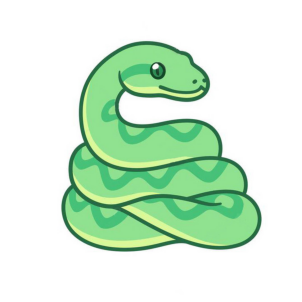

In [9]:
p.image()

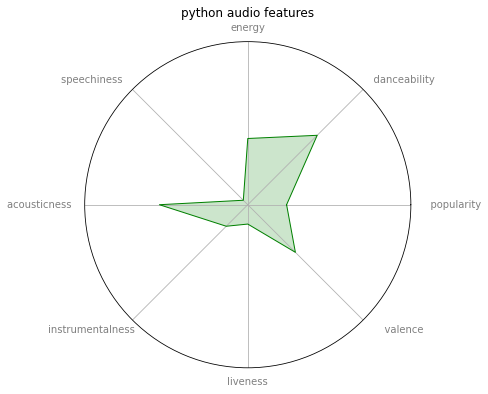

In [10]:
p.plot()

In [11]:
np.mean([1,2,3])

2.0

In [12]:
pr1.port('test1.csv')

python >>> test1.csv


In [13]:
mg=merger(p)

In [14]:
mg.add_discogs('ds.csv')

In [15]:
pr2=porter(p)

In [16]:
pr2.port('test2.csv')

python >>> test2.csv


In [17]:
pr2.port('spin.csv', spinitron = True)

python >>> spin.csv


In [18]:
p.info()

name: python
description: 
duration_ms: 2964020
tracks:
  Fantasy Movie
  Hawt Heart
  Frame Of Reference
  Summer Storm
  She's a Ridin' Man, a Hitchin' Man
  Karaoke Angel
  Cumulous Potion (For the Clouds to Sing)
  Lady Rosa's Moonlight Theme
  Sky, Ocean, and Weapons (空と海と兵器)
  Baby Where You Are
  anything
  Nervs
  Love Hurts
  Sweetness
  Fell In Love At 22
image_url: https://i.scdn.co/image/ab67706c0000bebbf358bd95b4bec9530db89502
danceability: 0.602
energy: 0.4060666666666667
key: 5.6
loudness: -10.9286
mode: 0.8
speechiness: 0.03875333333333334
acousticness: 0.541858
instrumentalness: 0.1866474866666667
liveness: 0.11864666666666666
valence: 0.4127999999999999
tempo: 114.39273333333335


In [19]:
p.tracks[1].info()

name: Hawt Heart
album: Born At Midnite
artist: Born At Midnite
duration_ms: 120069
explicit: True
popularity: 18
release: 2020-03-06
image_url: https://i.scdn.co/image/ab67616d0000b273b5c11a08b6d9a2e13f095091
danceability: 0.867
energy: 0.637
key: 7
loudness: -6.992
mode: 0
speechiness: 0.0512
acousticness: 0.306
instrumentalness: 0.0537
liveness: 0.069
valence: 0.84
tempo: 105.918
label: Arbutus Records
country: Canada
genres: Electronic Rock
styles: Italo-Disco


In [20]:
'Import a playlist'.lower()

'import a playlist'

In [21]:
w=input()
print(w)

In [22]:
p.info()

name: python
description: 
duration_ms: 2964020
tracks:
  Fantasy Movie
  Hawt Heart
  Frame Of Reference
  Summer Storm
  She's a Ridin' Man, a Hitchin' Man
  Karaoke Angel
  Cumulous Potion (For the Clouds to Sing)
  Lady Rosa's Moonlight Theme
  Sky, Ocean, and Weapons (空と海と兵器)
  Baby Where You Are
  anything
  Nervs
  Love Hurts
  Sweetness
  Fell In Love At 22
image_url: https://i.scdn.co/image/ab67706c0000bebbf358bd95b4bec9530db89502
danceability: 0.602
energy: 0.4060666666666667
key: 5.6
loudness: -10.9286
mode: 0.8
speechiness: 0.03875333333333334
acousticness: 0.541858
instrumentalness: 0.1866474866666667
liveness: 0.11864666666666666
valence: 0.4127999999999999
tempo: 114.39273333333335


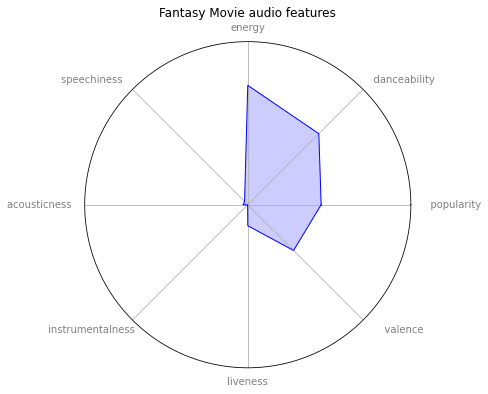

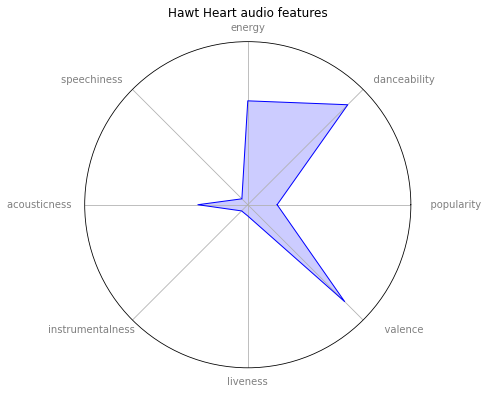

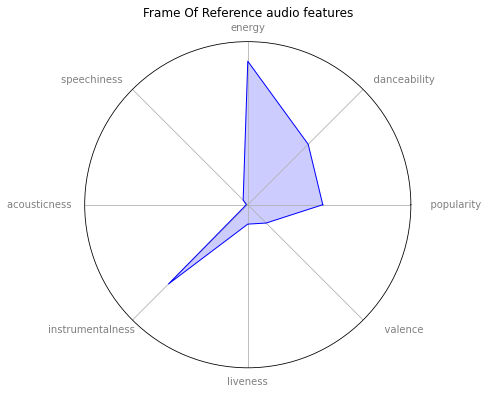

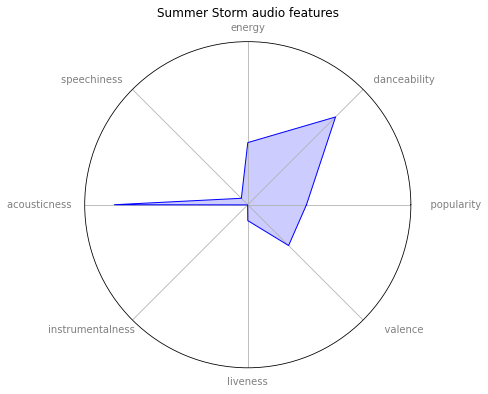

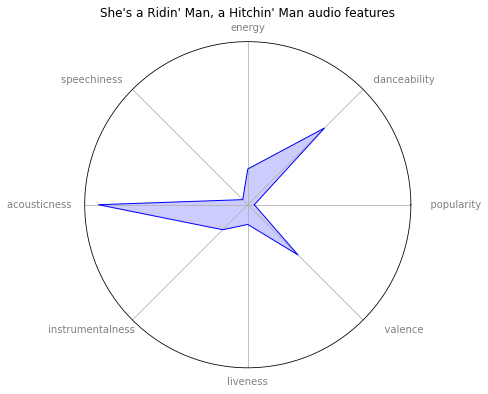

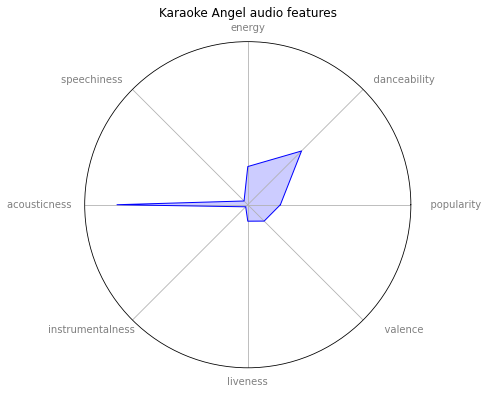

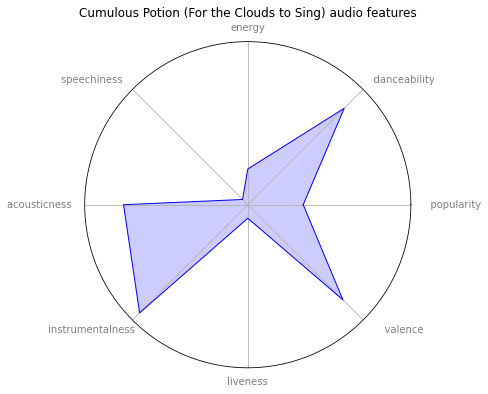

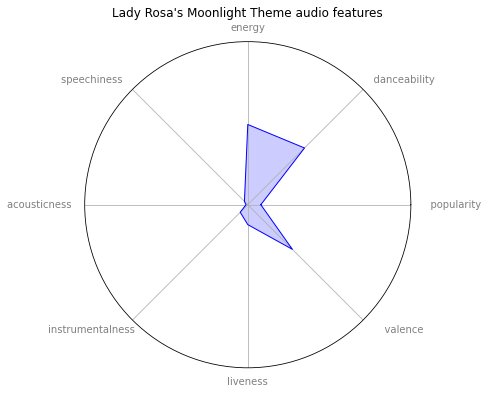

/Users/Iris/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Iris/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Iris/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 28023 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Iris/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20853 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Iris/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Iris/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backe

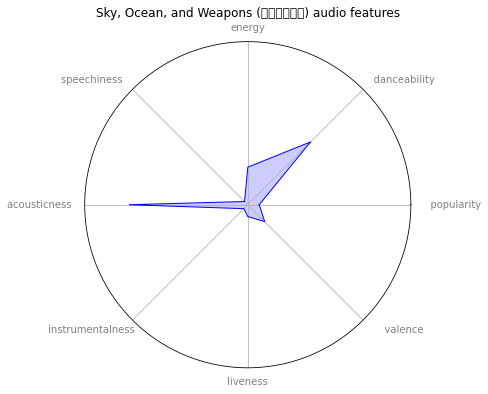

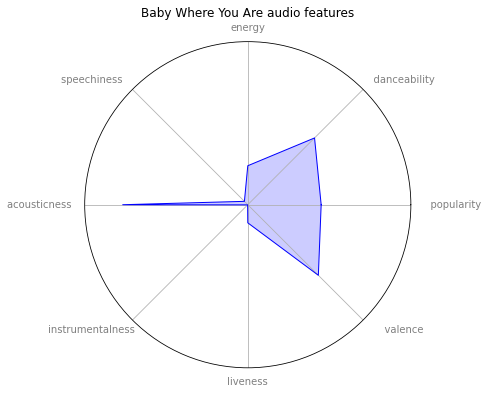

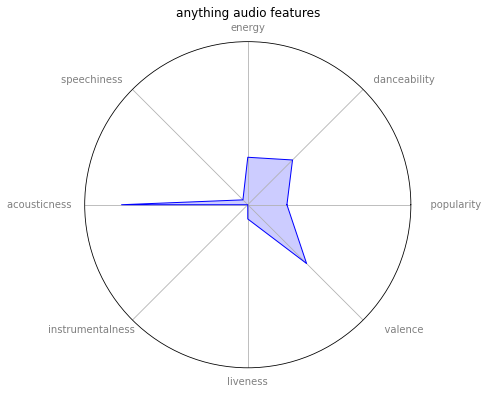

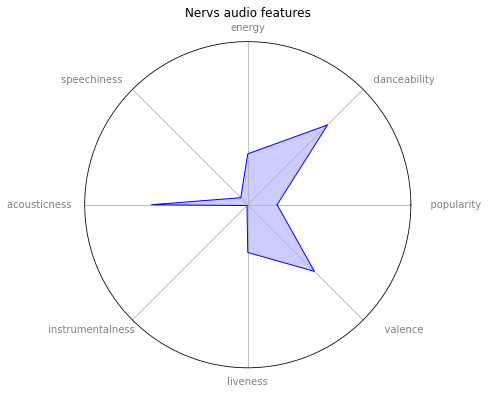

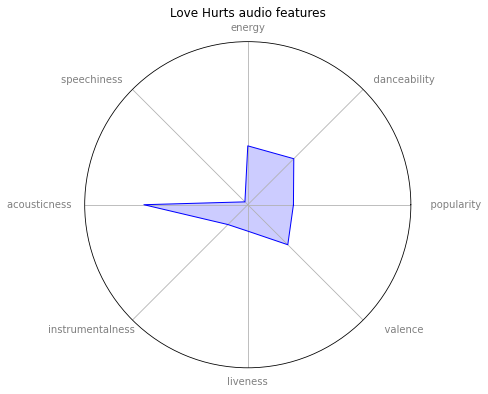

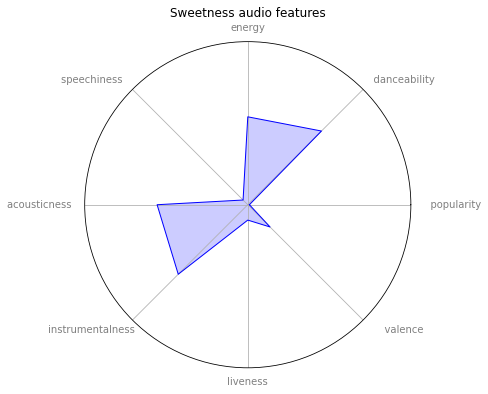

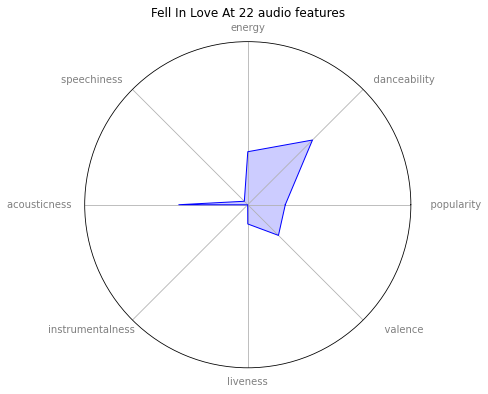

In [23]:
for i in p.tracks:
    i.plot()

# References
https://www.python-graph-gallery.com/radar-chart/

https://docs.python.org/3/library/csv.html

https://developer.spotify.com/documentation/web-api/reference/


<ipython-input-3-e0cb0f190f65>:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes([0,0,1,1])


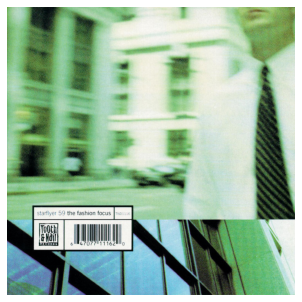

In [26]:
for i in p.tracks:
    i.image()
    print()

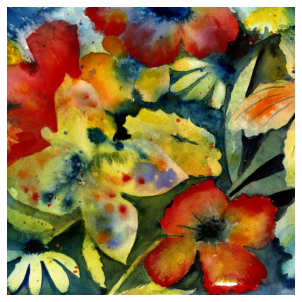

In [40]:
p.tracks[10].image()

In [42]:
p.tracks[10].info()

name: anything
album: songs
artist: Adrianne Lenker
duration_ms: 202047
explicit: True
popularity: 24
release: 2020-10-23
image_url: https://i.scdn.co/image/ab67616d0000b2731e15b31739403f7bf7db598f
danceability: 0.388
energy: 0.291
key: 3
loudness: -12.952
mode: 1
speechiness: 0.0421
acousticness: 0.774
instrumentalness: 1.93e-05
liveness: 0.0874
valence: 0.51
tempo: 83.943
label: 4AD
country: US
genres: Folk, World, & Country
styles: Folk


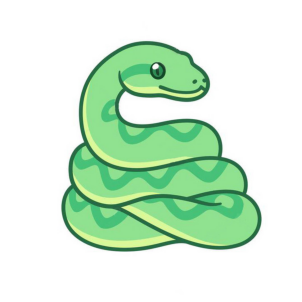

In [43]:
p.image()

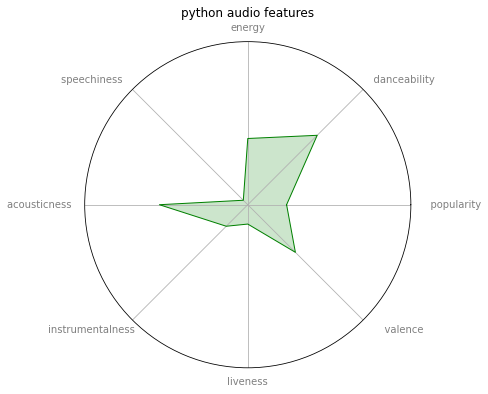

In [44]:
p.plot()

In [45]:
p.info()

name: python
description: 
duration_ms: 2964020
tracks:
  Fantasy Movie
  Hawt Heart
  Frame Of Reference
  Summer Storm
  She's a Ridin' Man, a Hitchin' Man
  Karaoke Angel
  Cumulous Potion (For the Clouds to Sing)
  Lady Rosa's Moonlight Theme
  Sky, Ocean, and Weapons (空と海と兵器)
  Baby Where You Are
  anything
  Nervs
  Love Hurts
  Sweetness
  Fell In Love At 22
image_url: https://i.scdn.co/image/ab67706c0000bebbf358bd95b4bec9530db89502
danceability: 0.602
energy: 0.4060666666666667
key: 5.6
loudness: -10.9286
mode: 0.8
speechiness: 0.03875333333333334
acousticness: 0.541858
instrumentalness: 0.1866474866666667
liveness: 0.11864666666666666
valence: 0.4127999999999999
tempo: 114.39273333333335


ValueError: could not convert string to float: ''

In [9]:
type(0.0)

float